# Clustering

Clustering is the unsupervised learning task of grouping object  based on given real and/or categorical input ("feature") data, _X_. The objective of clustering is to learn groupings such that objects in the same group (called a cluster) are more similar to each other than to those in other groups (clusters).

A variety of clustering algorithms exist. These algorithms can assign clusters to points based on different properties, including distance connectivity, centroid distance, distributional similarity, relative density, and graph connectivity.

Here, we'll use the scikit-learn (sklearn) package to expore the use of several clustering algorithms. Let's fetch the Iris dataset from the UCI Machine Learning repository.

# *k*-Means Clustering

Let's begin by loading some basic packages and the Iris dataset, a well-known multivariate dataset with four features describing three classes of flowers.

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import pylab as plt
from sklearn import datasets

np.random.seed(5)

#fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
#data = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Name'], header=None)
data = datasets.load_iris()

X = data.data
y = data.target

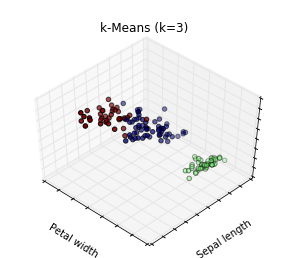

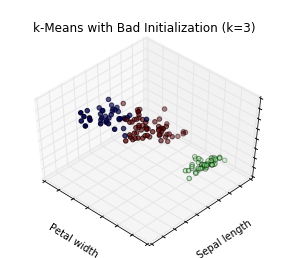

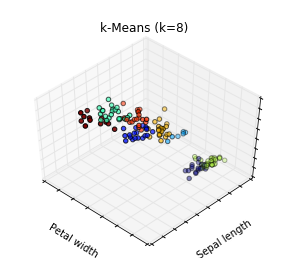

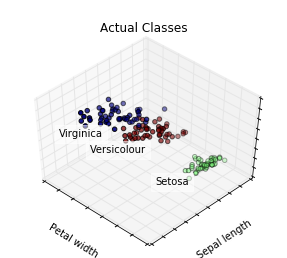

In [2]:
from sklearn.cluster import KMeans

# Define a set of k-means estimators.
estimators = {'k-Means (k=3)': KMeans(n_clusters=3),
              'k-Means (k=8)': KMeans(n_clusters=8),
              'k-Means with Bad Initialization (k=3)': KMeans(n_clusters=3, n_init=1,
                                                             init='random')}

fignum = 1
for name, est in estimators.items():
    # Define a matplotlib figure.
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()

    # Fit the estimator.
    est.fit(X)
    labels = est.labels_

    # Define a scatterplot.
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    # Customize the plot.
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.title("\n" + name + "\n")
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.title("\nActual Classes\n")
plt.show()

Now let's load the Digits dataset, a well-known dataset that is composed of handwritten digits between 0 and 9 stretched into a rectangular 16x16 box. Each instance in the dataset has 64 features, representing the individual pixels that comprise the image of a digit.

In [3]:
#### Digits Dataset ####

import numpy as np
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn import datasets
from sklearn.decomposition import RandomizedPCA
from matplotlib import pyplot as plt
from matplotlib import cm

# Load digits dataset
data = datasets.load_digits()
t = data['target']

To help visualize our clusters, we can use PCA to perform dimensionality reduction to reduce the digits dataset from 64 features (dimensions) to 2.

In [4]:
# Perform PCA dimensionality reduction.
pca = RandomizedPCA(n_components=2).fit(data['data'])
X = pca.transform(data['data'])

/Users/reidjohnson/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
# Cluster data into k=1..20 clusters.
K_MAX = 20
KK = range(1,K_MAX+1)

KM = [kmeans(X,k) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

# Cluster evaluation
tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss          # The between-cluster sum of squares

We can sweep over a range of k values (here, from 1 to 20) to identify the "elbow" point. The point where *k*=10 is denoted as the elbow point via a red circle in this plot. As there are ten digits in the dataset, the optimal value of *k*-means should ideally be ten.

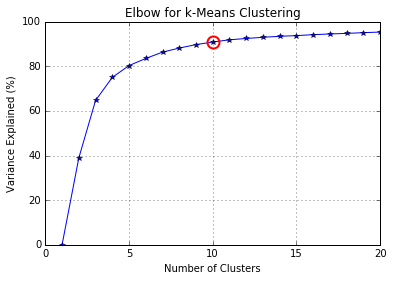

In [6]:
# Plots
kIdx = 9 # k=10
clr = cm.spectral( np.linspace(0,1,10) ).tolist()

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Variance Explained (%)')
plt.title('Elbow for k-Means Clustering')

With k=10 we can extract the particular points that represent the cluster centroids. As we are defining ten clusters, there are ten cluster centroids, one corresponding to each cluster.

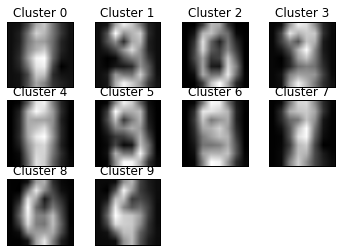

In [7]:
# Show centroids for k=10 clusters.
plt.figure()
for i in range(kIdx+1):
    img = pca.inverse_transform(centroids[kIdx][i]).reshape(8,8)
    ax = plt.subplot(3,4,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img, cmap=cm.gray)
    plt.title( 'Cluster %d' % i )

Finally, we can compare the clusters produced by k-means with ten clusters to the actual classes of the digits.

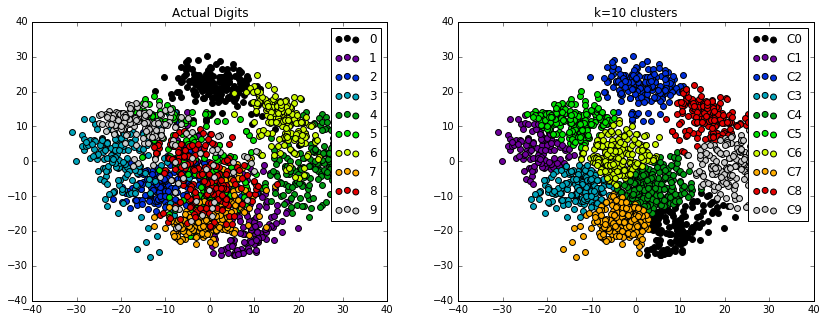

In [8]:
# Compare k=10 clustering vs. actual digits (PCA projections).
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121)
for i in range(10):
    ind = (t==i)
    ax.scatter(X[ind,0],X[ind,1], s=35, c=clr[i], label='%d'%i)
plt.legend()
plt.title('Actual Digits')
ax = fig.add_subplot(122)
for i in range(kIdx+1):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X[ind,0],X[ind,1], s=35, c=clr[i], label='C%d'%i)
plt.legend()
plt.title('k=%d clusters'%KK[kIdx])

plt.show()

In [9]:
import time as time
import numpy as np
import scipy as sp
import pylab as pl
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

### Reducing the number of colors with K-means clustering

This examlpe performs a pixel-wise Vector Quantization (VQ) of an image of the summer palace (China), reducing the number of colors required to show the image from 96,615 unique colors to 64, while preserving the overall appearance quality.

In this example, pixels are represented in a 3D-space and K-means is used to find 64 color clusters. In the image processing literature, the codebook obtained from K-means (the cluster centers) is called the color palette. Using a single byte, up to 256 colors can be addressed, whereas an RGB encoding requires 3 bytes per pixel. The GIF file 
format, for example, uses such a palette.

For comparison, a quantized image using a random codebook (colors picked up randomly) is also shown.

Source: http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

Fitting model on a small sub-sample of the data
done in 0.209s.
Predicting color indices on the full image (k-means)
done in 0.206s.
Predicting color indices on the full image (random)
done in 0.419s.


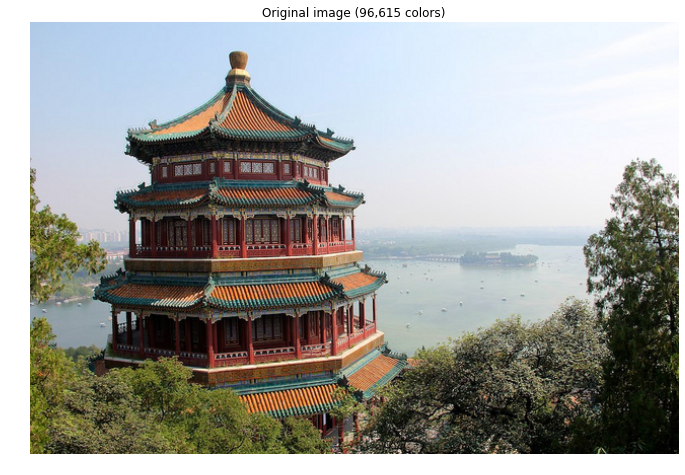

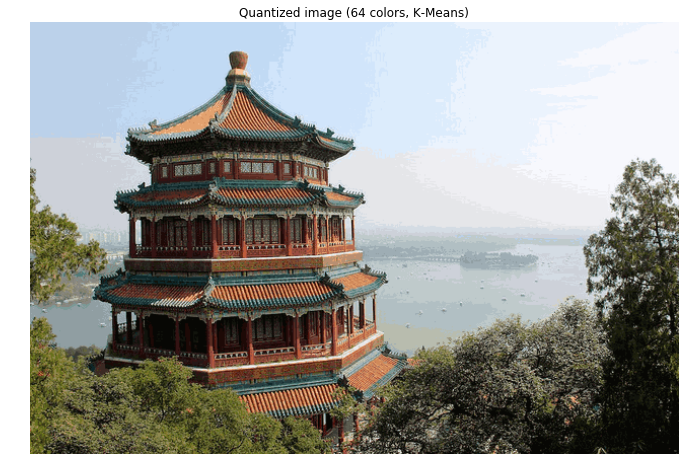

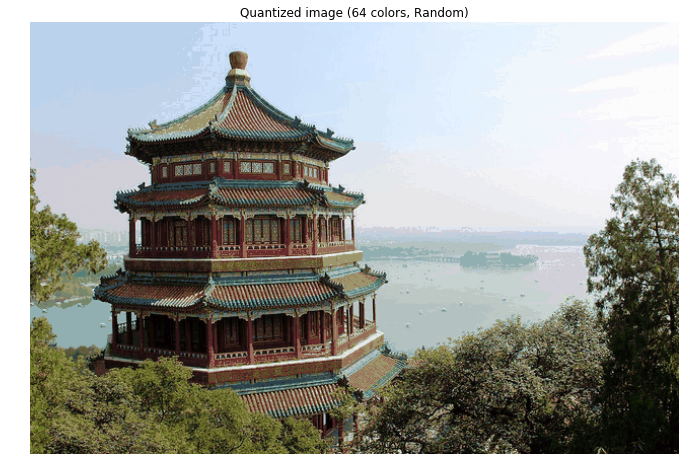

In [10]:
n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that pl.imshow behaves works well on float data (need to
# be in the range [0-1]
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time.time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time.time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time.time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time.time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors + 1]
print("Predicting color indices on the full image (random)")
t0 = time.time()
dist = euclidean_distances(codebook_random, image_array, squared=True)
labels_random = dist.argmin(axis=0)
print("done in %0.3fs." % (time.time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
pl.figure(1,figsize=(10, 6))
pl.clf()
ax = pl.axes([0, 0, 1, 1])
pl.axis('off')
pl.title('Original image (96,615 colors)')
pl.imshow(china)

pl.figure(2,figsize=(10, 6))
pl.clf()
ax = pl.axes([0, 0, 1, 1])
pl.axis('off')
pl.title('Quantized image (64 colors, K-Means)')
pl.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

pl.figure(3,figsize=(10, 6))
pl.clf()
ax = pl.axes([0, 0, 1, 1])
pl.axis('off')
pl.title('Quantized image (64 colors, Random)')
pl.imshow(recreate_image(codebook_random, labels_random, w, h))
pl.show()

### Hierarchical clustering

An illustration of various linkage option for agglomerative clustering on a 2D embedding of the digits dataset.
The goal of this example is to show intuitively how the metrics behave, and not to find good clusters for the digits. This is why the example works on a 2D embedding.

What this example shows us is the behavior "rich getting richer" of agglomerative clustering that tends to create uneven cluster sizes. This behavior is especially pronounced for the average linkage strategy, that ends up with a couple of singleton clusters.

Automatically created module for IPython interactive environment
Computing embedding
Done.
ward : 18.40s
average : 18.74s
complete : 18.60s


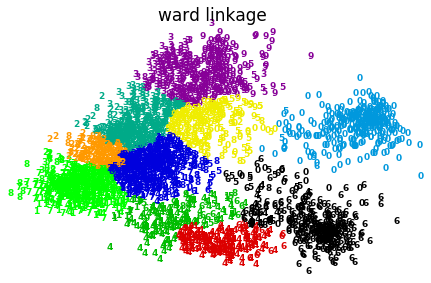

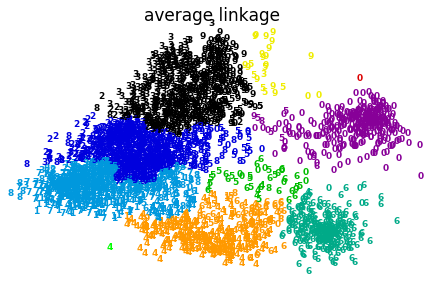

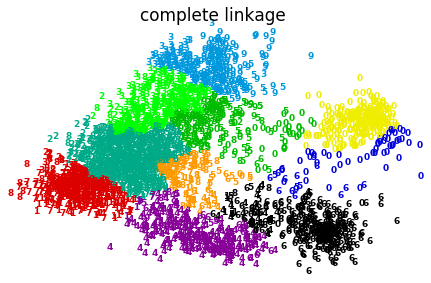

In [11]:
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()